Trying another method

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv',encoding='unicode-escape')

In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df.insert(3,'pos_rev','0')
df.insert(4,'neg_rev','0')
df.insert(5,'neutral_or_unknown','0')
df.loc[df.is_there_an_emotion_directed_at_a_brand_or_product == 'Positive emotion','pos_rev']='1'
df.loc[df.is_there_an_emotion_directed_at_a_brand_or_product == 'Negative emotion','neg_rev']='1'
df.loc[df.is_there_an_emotion_directed_at_a_brand_or_product == 'No emotion toward brand or product','neutral_or_unknown'] = '1'
df.loc[df.is_there_an_emotion_directed_at_a_brand_or_product == 'I can\t tell','neutral_or_unknown'] = '1'
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,pos_rev,neg_rev,neutral_or_unknown
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1,0,0
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1,0,0
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,1,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1,0,0


In [5]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [6]:
df.insert(6,'apple_product','0')
df.insert(7,'google_product','0')
df.loc[df.emotion_in_tweet_is_directed_at == 'iPad','apple_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'Apple','apple_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'iPad or iPhone App','apple_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'iPhone','apple_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'Other Apple product or service','apple_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'Google','google_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'Other Google product or service','google_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'Android App','google_product']='1'
df.loc[df.emotion_in_tweet_is_directed_at == 'Android','google_product']='1'

df.head()
df.to_csv('../../data/expanded_dataframe.csv')

In [7]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

In [8]:
apple = df['apple_product'] == '1'
apple = df[apple]
apple.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,pos_rev,neg_rev,neutral_or_unknown,apple_product,google_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0,1,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1,0,0,1,0
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1,0,0,1,0
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,1,0,1,0
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,1,0,0,1,0


In [9]:
apple.shape

(2409, 8)

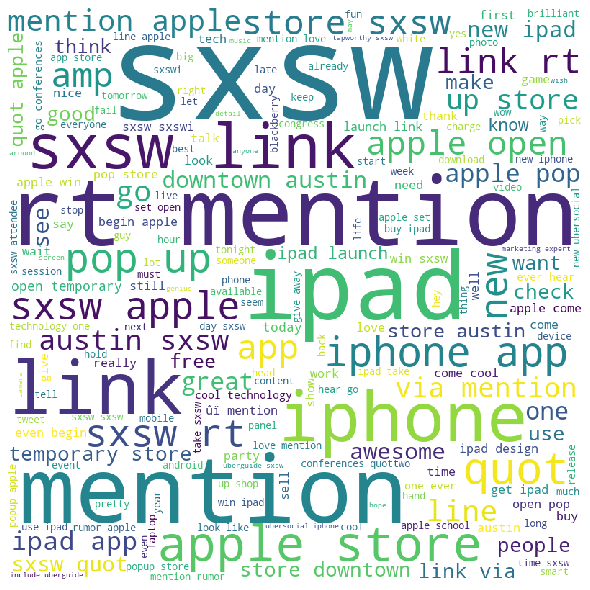

In [19]:
#Let's try a word cloud with tweets directed at Apple Products
apl_prd = pd.read_csv('apl_prd.csv')

comment_words = '' 
stopwords = set(STOPWORDS) 

for word in apl_prd.tweet_text:
    word = str(word)
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

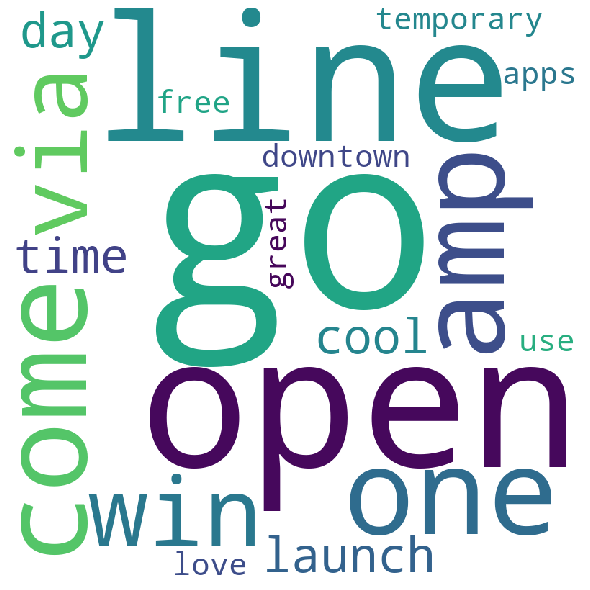

In [18]:
apl_prd_cleaned = pd.read_csv('apl_prd_custom_stop.csv')

comment_words = '' 
stopwords = set(STOPWORDS) 

for word in apl_prd_cleaned.tweet_text:
    word = str(word)
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [12]:
google.shape

(882, 8)

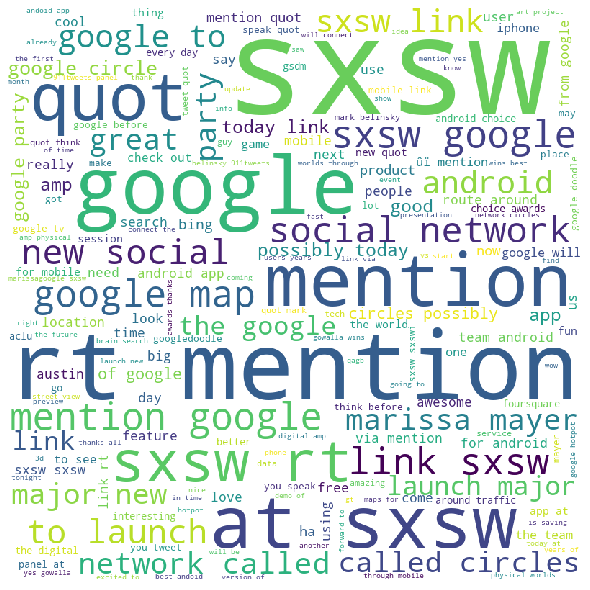

In [13]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for word in google.tweet_text:
    word = str(word)
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Neat!  But it looks like this is not working quite right, gonna try again with a different approach